![Asig1](Problem1A.png)

![Problem2](Problem1B.png)

\section*{a)}

In [1]:
from math import sin,pi
from numpy import arange,floor,array
from pylab import *

In [2]:
def f(Vout,t,RC):
    if floor(2*t)% 2 ==0:
        Vin = 1
    else:
        Vin=-1
        
    return (Vin-Vout)/RC


def rk4(f,a,b,N):
    h = (b-a)/N
    tpoints = arange(a,b,h)
    Vpoints = []
    x = 0.0

    for t in tpoints:
        Vpoints.append(x)
        k1 = h*f(x,t,RC)
        k2 = h*f(x+0.5*k1,t+0.5*h,RC)
        k3 = h*f(x+0.5*k2,t+0.5*h,RC)
        k4 = h*f(x+k3,t+h,RC)
        x += (k1+2*k2+2*k3+k4)/6
    return tpoints, Vpoints

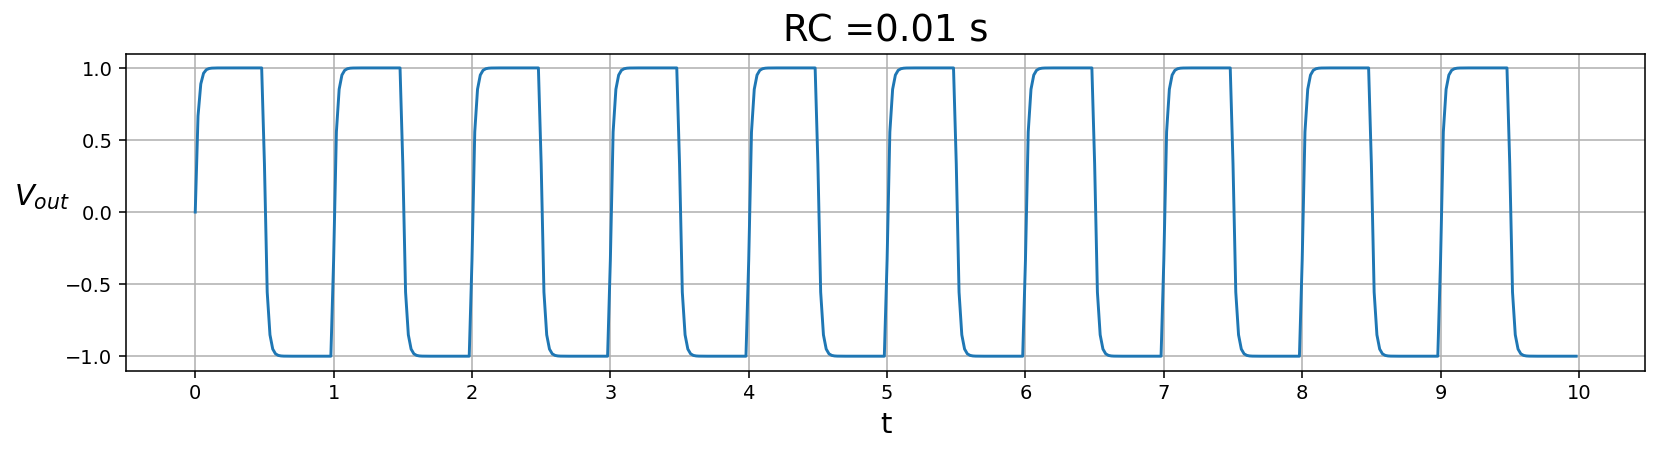

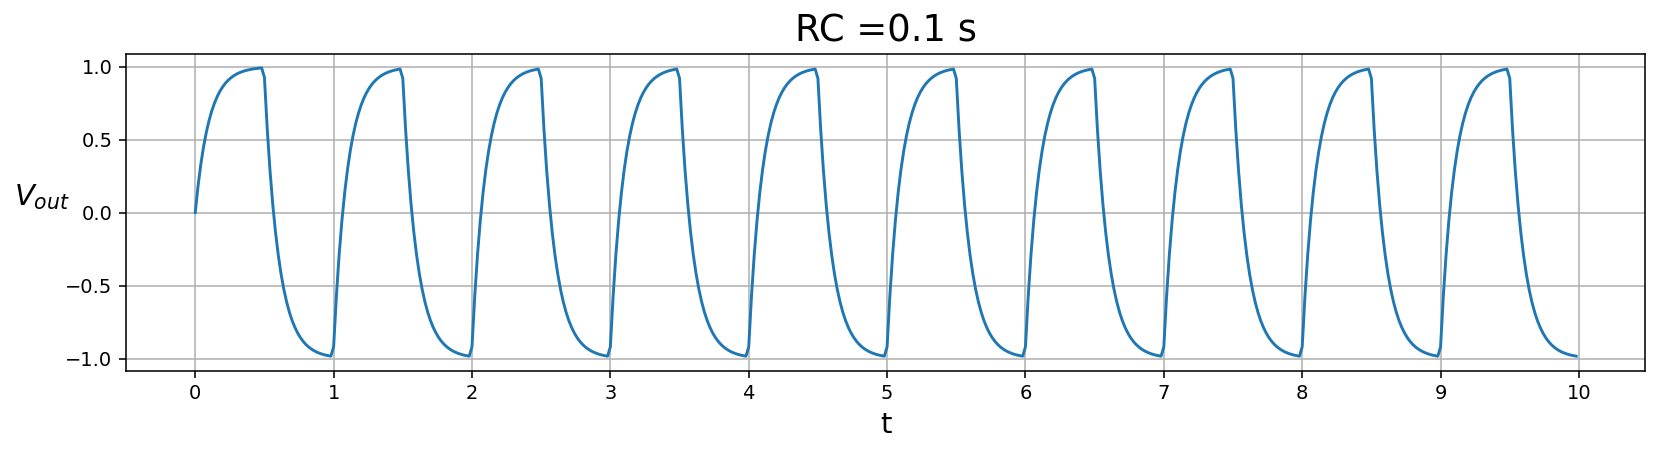

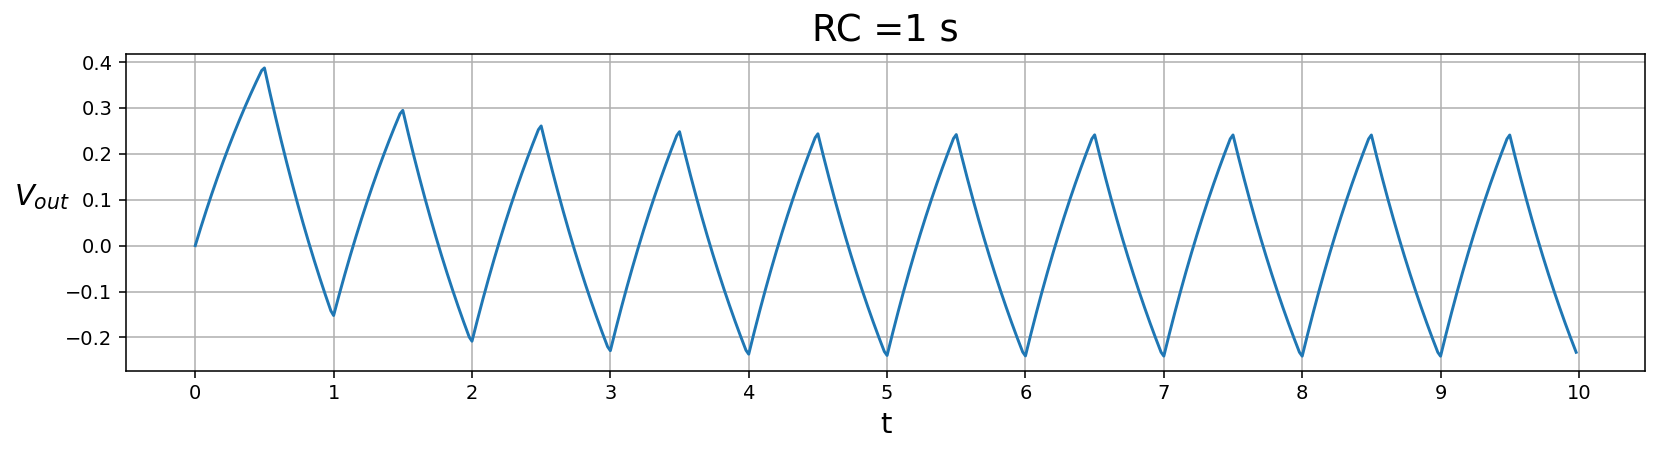

In [3]:

a = 0.0
b = 10.0
N = 500
i=1

for RC in [0.01,0.1,1]:
    tpoints,Vpoints=rk4(f,a,b,N)


    figure(figsize=(14,3),dpi=140);
    plot(tpoints,Vpoints)
    xlabel("t",size=15)
    xticks(arange(0,10.5,1))
    ylabel("$V_{out}$",size=15,rotation=0,labelpad=12)
    title("RC ={} s".format(RC),size=19)
    grid()

    show()
    
    i+=1
    

\section*{b)}

Lo que se observa en estas gráficas es como cambia el potencial $V_{out}$ con el tiempo. Notamos que mientras el tiempo característico del circuito $(RC)$ aumenta, el voltaje tarda más en llegar a $1$ o $-1$.

Cuando $RC = 0.01$ el capacitor se llena rápidamente y el circuito espera a que comience a cambiar la polaridad para descargar el capacitor pero se descarga rápidamente tambien. Notamos que mientras más aumento el tiempo característico, el voltaje $V_{\text{out}}$ llega al máximo de $1$ o $-1$ pero comienza prontamente a descargarse el capacitor y vemos que el voltaje cambia lentamente.

\clearpage

![](Lotka1.png)

![](Lotka2.png)

\section*{a)}

In [4]:
def f(r,t):
    alpha=1
    beta=.5
    gamma=beta
    delta=2
    x = r[0]
    y = r[1]
    fx = alpha*x - beta*x*y
    fy =  gamma*x*y - delta*y
    return array([fx,fy],float)

In [5]:
a = 0.0
b = 30.0
N = 500
def rk4_2d(f,a,b,N,Init_cond=[0,0]):
    
    h = (b-a)/N

    tpoints = arange(a,b,h)
    xpoints = []
    ypoints = []
        
    r = array(Init_cond,float)
        
    for t in tpoints:
        xpoints.append(r[0])
        ypoints.append(r[1])
        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1,t+0.5*h)
        k3 = h*f(r+0.5*k2,t+0.5*h)
        k4 = h*f(r+k3,t+h)
        r += (k1+2*k2+2*k3+k4)/6
    return tpoints,xpoints,ypoints

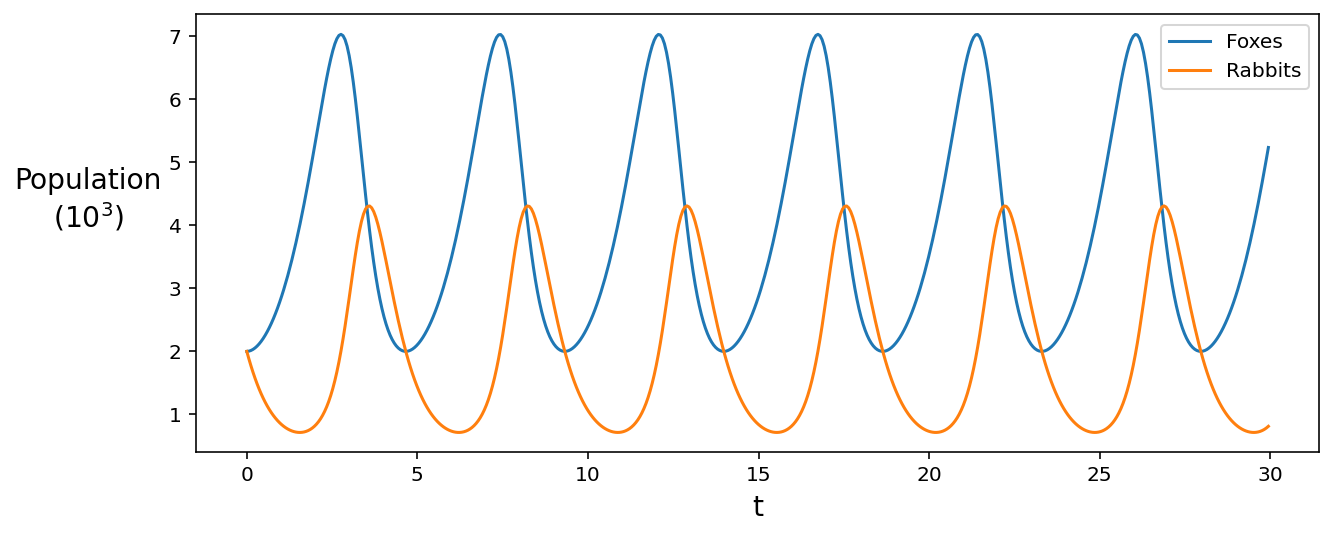

In [6]:
tpoints,xpoints,ypoints=rk4_2d(f,a,b,N,Init_cond=[2,2])
figure(figsize=(10,4),dpi=145)
plot(tpoints,xpoints,label='Foxes')
plot(tpoints,ypoints,label='Rabbits')
legend()
ylabel('Population\n($10^{3})$',size=14,rotation=0,labelpad=40)
xlabel("t",size=14)
show()

\section*{b)}

En la gráfica se observa el comportamiento de las poblaciones de la presa (conejos) y los depredadores (zorro). Mientras aumenta la población de los zorros, disminuye la población de los conejos, cuando la población de los conejos llega a un mínimo los zorros se quedan sin alimento y comienzan a morir, lo que permite que los conejos puedan aumentar su población.

\clearpage

![](Problem3.png)

In [7]:
g =9.81 
l =0.1 # 10cm = 0.1m 
a=0
b=10
N=1000
def f(r,t): 
    theta = r[0]
    omega = r[1]
    ftheta =omega
    fomega =-(g/l)*sin(theta)
    return array([ftheta,fomega] ,float)

In [8]:
theta0=179*pi/180
omega=0
Init=[theta0,omega]
t,theta,omega=rk4_2d(f,a,b,N,Init_cond=Init)

ticks=arange(-pi,pi+pi/2,pi/2)
labels=['$-\pi$',r'$-\frac{1}{2} \pi$','0',r'$\frac{1}{2}\pi$','$\pi $']

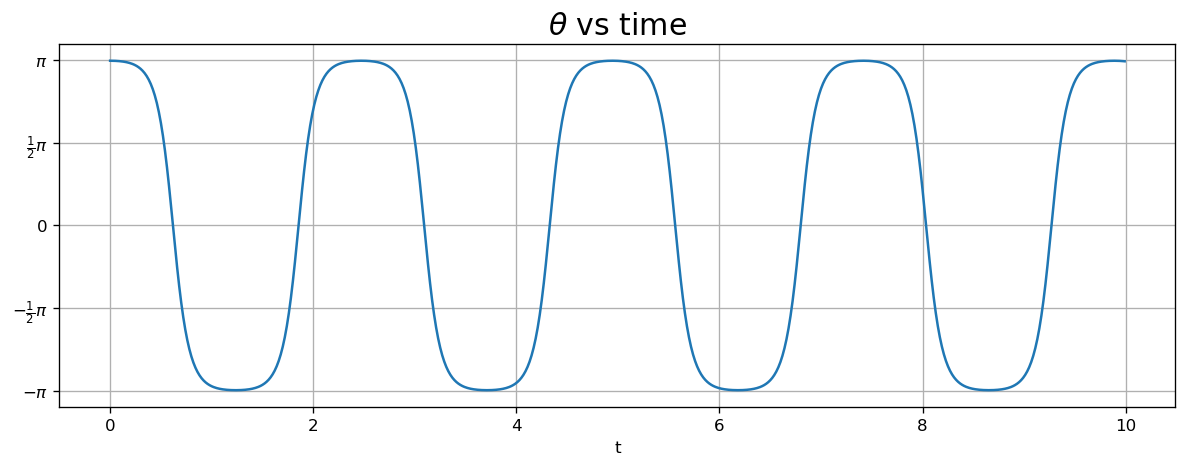

In [9]:
figure(dpi=120,figsize=(12,4))
# subplot(121)
plot(t,theta)

grid()
yticks(ticks=ticks,labels=labels)
xlabel('t')
title(r"$\theta$ vs time",size=18)

show()

\section*{b)}

In [10]:
from vpython import *

<IPython.core.display.Javascript object>

In [11]:
x=l * cos(theta0 )
y=l * sin(theta0 )

rod = cylinder(pos=vector(0, 0, 0), axis=vector(x,y, 0), radius=l/30)
bob = sphere(pos=vector(x, y, 0), radius=l/10)
for theta in theta:
    rate(90)
    x=l * cos(theta - pi / 2)
    y=l * sin(theta - pi / 2)
    rod.axis = vector(x, y, 0)
    bob.pos = vector(x,y, 0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

\clearpage

![](Problem4.png)

\section*{a)}

In [12]:
g =9.81 
l =0.1 # 10cm = 0.1m 
a=0
b=100
N=6000

Omega=5
C=2

def f(r,t): 
    theta = r[0]
    omega = r[1]
    ftheta =omega
    fomega =-(g/l)*sin(theta) + C* cos(theta)* sin(Omega*t)
    return array([ftheta,fomega] ,float)

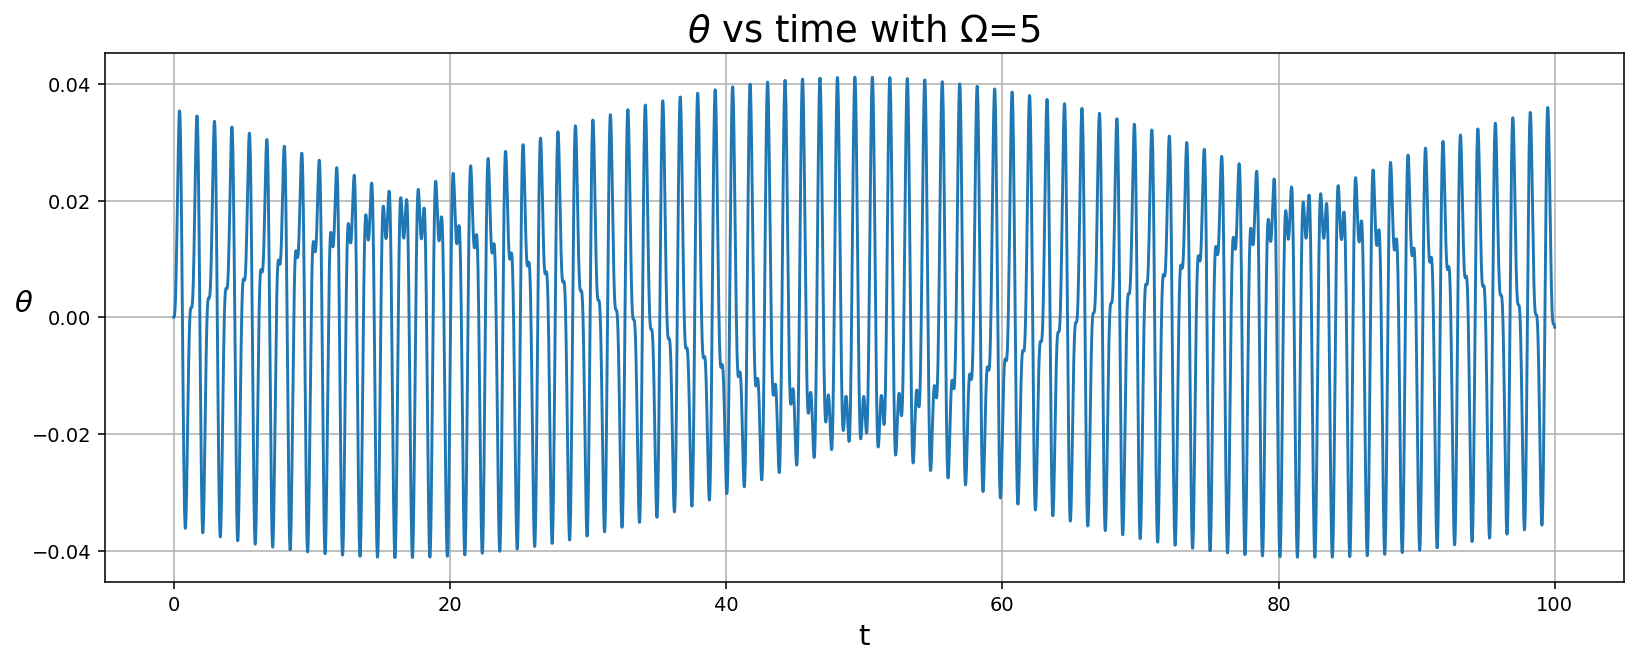

In [13]:
theta0=0
omega=0

Init=[theta0,omega]
t,theta,omega=rk4_2d(f,a,b,N,Init_cond=Init)


figure(figsize=(14,5),dpi=140)
plot(t,theta)
xlabel("t",size=15)
title(r'$\theta$ vs time with $\Omega$={}'.format(Omega),size=19)
ylabel(r"$\theta$",rotation=0,size=15)
grid()

show()


section*{b)}

Theta en resonancia: 1.3376359662224735
Valor de Omega que produce resonancia: 9.5


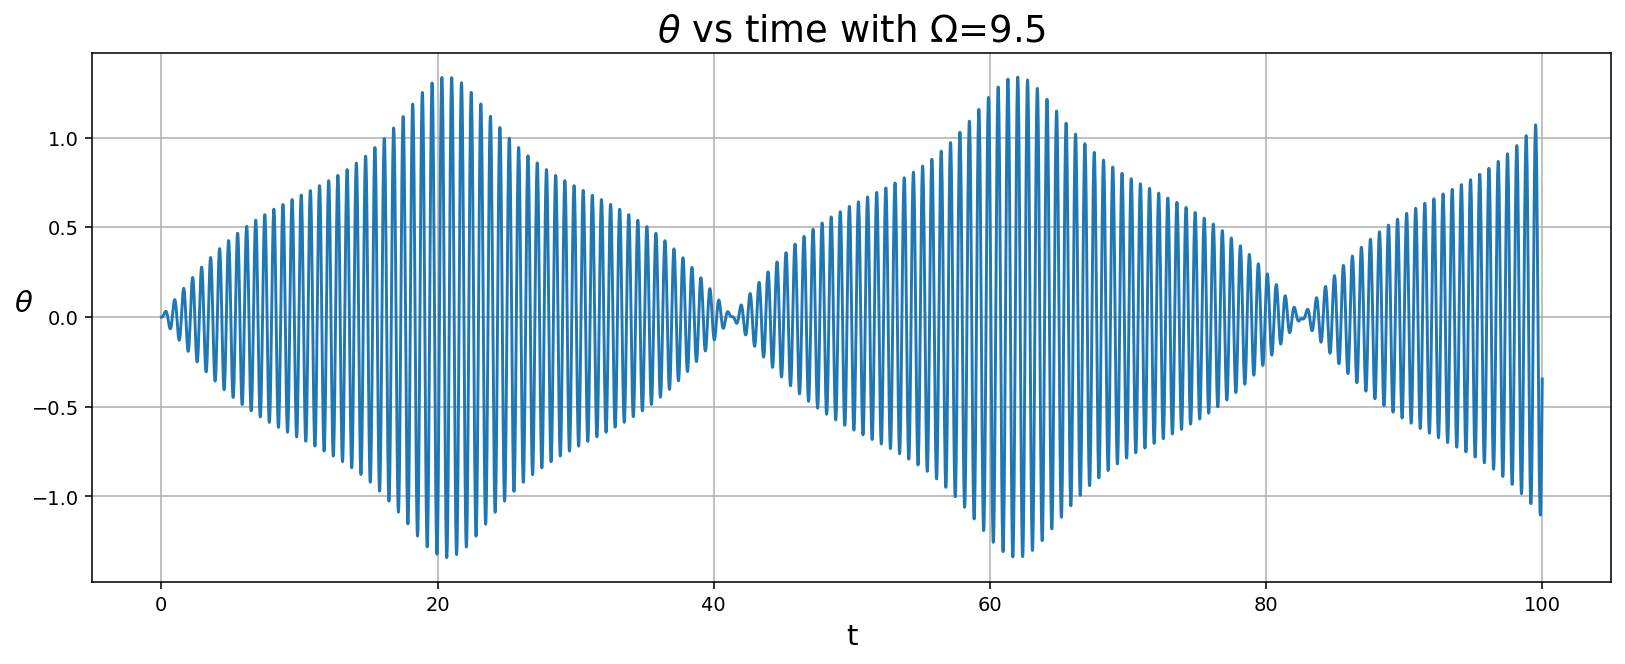

In [14]:
theta0=0
omega=0

Init=[theta0,omega]
figure(figsize=(14,5),dpi=140)
tmax=1
for Omega in arange(5,15,.25):
    t,theta,omega=rk4_2d(f,a,b,N,Init_cond=Init)
    if max(theta) > tmax:
        tmax=max(theta)
        Omega_resonant=round(Omega,ndigits=2)
print("Theta en resonancia:",tmax)
print("Valor de Omega que produce resonancia:",Omega_resonant)

Omega=Omega_resonant
t,theta,omega=rk4_2d(f,a,b,N,Init_cond=Init)

plot(t,theta)
xlabel("t",size=15)
title(r'$\theta$ vs time with $\Omega$={}'.format(Omega),size=19)
ylabel(r"$\theta$",rotation=0,size=15)
grid()

show()
